<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Capstone Project Coursera</font></h1>

## Introduction

This Notebook outlines my Capstone Project for the IBM Data Science Professional Certificate.

The purpose of this project is to provide information to help people looking for residential areas similar to their current neighbourhood or a desired neighbourhood. This will be done using both census and non-census data.

In this project, I will be grouping the neighbourhoods into clusters leveraging the Foursqure API and GoogleMaps API. The Foursquare API will provide the non-census features such as bus stations, cafes etc; the GoogleMAPS API will be used to retrieve the Longititude and Latitude of the different Neighbourhoods in Toronto. Census data will be provide via the City of Toronto website. 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
1. [Library Import]<br>
2. [Download and Explore Data]<br>
3. [Explore Neighbourhoods in Toronto]<br>
4. [Analyze each Neighourhood]<br>
5. [Cluster Data]<br>
6. [Examine Cluster]<br>
</div>
<hr>

# 1. Library Import

In [1]:
%matplotlib inline
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import requests # library to handle requests

# # Matplotlib and associated plotting modules
# import matplotlib.cm as cm
# import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library


print('Libraries imported.')

Libraries imported.


#  2. Download and Explore Data

In [2]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1d32bf53e83645b1a08ce5890bc2eebd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='d-jAq73xH8OjqErAfnJtBQ0fYQHcpZ94PPzZnzIZkgm0',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1d32bf53e83645b1a08ce5890bc2eebd.get_object(Bucket='capstone-donotdelete-pr-e7q1qsawav1t8m',Key='neighbourhood-profiles-2016-csv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


### Remove spaces from the column names

In [3]:
df_data_1.rename(columns=lambda x: x.strip(), inplace=True)

### In order for every row in the Characteristic column to be unqiue, the id is added as a suffix.

In [4]:
row = 0
for i, j in zip(df_data_1._id, df_data_1.Characteristic):
    
    x = j.strip()+'_'+str(i)
    df_data_1.Characteristic[row] = x
    row+=1
    
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Columns that are not needed are dropped and the Dataframe is transposed making the Characteristic column the header.

In [5]:
df_data_1.drop(columns = ['_id', 'Category','Topic', 'Data Source', 'City of Toronto'], inplace = True)
df_data_1.rename(columns = {'Characteristic': 'id'}, inplace = True)
df_data_1.set_index('id', inplace = True)
df_data_1 = df_data_1.transpose()
df_data_1.head()

id,Neighbourhood Number_1,TSNS2020 Designation_2,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,Children (0-14 years)_10,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
Agincourt North,129,No Designation,"29,113","30,279",-3.90%,"9,371","9,120","3,929",7.41,"3,840",...,605,"27,490","18,865","8,610","5,445","3,170",880,735,135,"2,280"
Agincourt South-Malvern West,128,No Designation,"23,757","21,988",8.00%,"8,535","8,136","3,034",7.83,"3,075",...,490,"22,325","13,565","8,775","5,610","3,145",980,760,220,"2,170"
Alderwood,20,No Designation,"12,054","11,904",1.30%,"4,732","4,616","2,435",4.95,"1,760",...,70,"11,370","8,235","3,130","2,200",925,680,615,70,245
Annex,95,No Designation,"30,526","29,177",4.60%,"18,109","15,934","10,863",2.81,"2,360",...,835,"27,715","12,980","14,735","8,340","6,390","3,930","2,630","1,310","2,460"
Banbury-Don Mills,42,No Designation,"27,695","26,918",2.90%,"12,473","12,124","2,775",9.98,"3,605",...,380,"25,925","16,300","9,625","6,480","3,140","1,405","1,190",220,"1,735"


### Additional columns are dropped, renamed, stripped of spaces, and the checked for the datatypes

In [6]:
df_data_1.drop(columns =['TSNS2020 Designation_2','Neighbourhood Number_1'], inplace = True)
df_data_1.reset_index(inplace = True)
df_data_1.rename(columns = {'index': 'Neighbourhood'}, inplace = True)
df_data_1.rename(columns=lambda x: x.strip(), inplace=True)
df_data_1.dtypes

id
Neighbourhood                                                              object
Population, 2016_3                                                         object
Population, 2011_4                                                         object
Population Change 2011-2016_5                                              object
Total private dwellings_6                                                  object
Private dwellings occupied by usual residents_7                            object
Population density per square kilometre_8                                  object
Land area in square kilometres_9                                           object
Children (0-14 years)_10                                                   object
Youth (15-24 years)_11                                                     object
Working Age (25-54 years)_12                                               object
Pre-retirement (55-64 years)_13                                            object
Seniors (65+ 

### Drop all columns where all the rows have no value

In [7]:
df_data_1.dropna(axis = 1, how ='all', inplace = True) 

### Convert the rows to the required datatypes

In [8]:
def conv_float(val):
    new_val = val.replace(',','')
    return float(new_val)
def conv_int(val):
    new_val = val.replace(',','')
    return int(new_val)
def conv_per(val):
    new_val = val.replace('%','')
    return float(new_val)

In [9]:
for i in df_data_1.columns:    
    try:
        if '%' in df_data_1[i][0]:
            df_data_1[i] = df_data_1[i].apply(conv_per)
            
        elif '.' in df_data_1[i][0]:
            df_data_1[i] = df_data_1[i].apply(conv_float)
            
        else:
            df_data_1[i] = df_data_1[i].apply(conv_int)
            
            
            
    except:
        continue


In [10]:
data = set(df_data_1.dtypes)
data

{dtype('int64'), dtype('float64'), dtype('O')}

In [11]:
df_data_1.head()

id,Neighbourhood,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,Children (0-14 years)_10,Youth (15-24 years)_11,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
0,Agincourt North,29113,30279,-3.9,9371,9120,3929,7.41,3840,3705,...,605,27490,18865,8610,5445,3170,880,735,135,2280
1,Agincourt South-Malvern West,23757,21988,8.0,8535,8136,3034,7.83,3075,3360,...,490,22325,13565,8775,5610,3145,980,760,220,2170
2,Alderwood,12054,11904,1.3,4732,4616,2435,4.95,1760,1235,...,70,11370,8235,3130,2200,925,680,615,70,245
3,Annex,30526,29177,4.6,18109,15934,10863,2.81,2360,3750,...,835,27715,12980,14735,8340,6390,3930,2630,1310,2460
4,Banbury-Don Mills,27695,26918,2.9,12473,12124,2775,9.98,3605,2730,...,380,25925,16300,9625,6480,3140,1405,1190,220,1735


In [12]:
df_data_1.shape

(140, 2326)

In [13]:
df_data_1.dropna(axis = 1, how ='all', inplace = True) 

In [14]:
nan_values = df_data_1.isna()
nan_columns = nan_values.any()

columns_with_nan = df_data_1.columns[nan_columns].tolist()
print(columns_with_nan)


[]


In [15]:
df_data_1.describe(include='object')

id,Neighbourhood,Employment rate_1890,Unemployment rate (Males)_1899,Employment rate (Females)_1906
count,140,140,140,140
unique,140,107,60,112
top,Stonegate-Queensway,55.9,9.5,51.7
freq,1,4,5,4


In [16]:
df_data_1['Employment rate_1890'] = df_data_1['Employment rate_1890'].astype('float')
df_data_1['Unemployment rate (Males)_1899'] = df_data_1['Unemployment rate (Males)_1899'].astype('float')
df_data_1['Employment rate (Females)_1906'] = df_data_1['Employment rate (Females)_1906'].astype('float')

In [17]:
df_data_1.describe(include='object')

id,Neighbourhood
count,140
unique,140
top,Stonegate-Queensway
freq,1


In [18]:
df_data_1.head()

id,Neighbourhood,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,Children (0-14 years)_10,Youth (15-24 years)_11,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
0,Agincourt North,29113,30279,-3.9,9371,9120,3929,7.41,3840,3705,...,605,27490,18865,8610,5445,3170,880,735,135,2280
1,Agincourt South-Malvern West,23757,21988,8.0,8535,8136,3034,7.83,3075,3360,...,490,22325,13565,8775,5610,3145,980,760,220,2170
2,Alderwood,12054,11904,1.3,4732,4616,2435,4.95,1760,1235,...,70,11370,8235,3130,2200,925,680,615,70,245
3,Annex,30526,29177,4.6,18109,15934,10863,2.81,2360,3750,...,835,27715,12980,14735,8340,6390,3930,2630,1310,2460
4,Banbury-Don Mills,27695,26918,2.9,12473,12124,2775,9.98,3605,2730,...,380,25925,16300,9625,6480,3140,1405,1190,220,1735


In [19]:
df_data_1.describe()

id,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,Children (0-14 years)_10,Youth (15-24 years)_11,Working Age (25-54 years)_12,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,19511.221429,18679.000000,4.040714,8421.835714,7949.492857,6261.135714,4.501714,2843.964286,2430.928571,8783.678571,...,427.821429,18257.821429,10829.357143,7429.000000,4564.464286,2863.392857,1315.285714,1008.714286,306.535714,1548.714286
std,10033.589222,9100.831576,8.903115,5360.479324,4795.151855,4840.359075,4.544665,1546.225445,1457.994778,5423.203831,...,419.961976,9485.240299,5270.422622,5399.529896,2678.992462,2894.359142,1724.417092,1284.353597,456.950282,1457.318219
min,6577.000000,6488.000000,-7.600000,2796.000000,2650.000000,1040.000000,0.420000,565.000000,675.000000,2750.000000,...,25.000000,6025.000000,2955.000000,2065.000000,1470.000000,515.000000,215.000000,165.000000,15.000000,195.000000
25%,12019.500000,11853.750000,-0.325000,5377.750000,5139.000000,3595.250000,1.852500,1695.000000,1428.750000,5465.000000,...,157.500000,11335.000000,7037.500000,4276.250000,2891.250000,1258.750000,567.500000,427.500000,110.000000,586.250000
50%,16749.500000,16364.500000,1.500000,6883.000000,6571.000000,5071.500000,3.275000,2405.000000,2100.000000,7475.000000,...,305.000000,15607.500000,9145.000000,6190.000000,3902.500000,2167.500000,912.500000,712.500000,195.000000,1167.500000
75%,23854.500000,22407.500000,4.250000,10109.500000,9538.500000,7621.250000,5.382500,3567.500000,3022.500000,10588.750000,...,536.250000,22396.250000,13557.500000,8885.000000,5595.000000,3255.000000,1376.250000,1078.750000,315.000000,1976.250000
max,65913.000000,53350.000000,52.000000,47209.000000,40756.000000,44321.000000,36.890000,9625.000000,7840.000000,45105.000000,...,3060.000000,63520.000000,31485.000000,45930.000000,21170.000000,24770.000000,16650.000000,12440.000000,4195.000000,9975.000000


In [20]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Columns: 2326 entries, Neighbourhood to External migrants_2383
dtypes: float64(33), int64(2292), object(1)
memory usage: 2.5+ MB


### Plot graphs highlighting the 2011 population, Land area in square kilometres, Youth (15-24 years), and Pre-retirement (55-64 years)  across the Neighbourhoods.

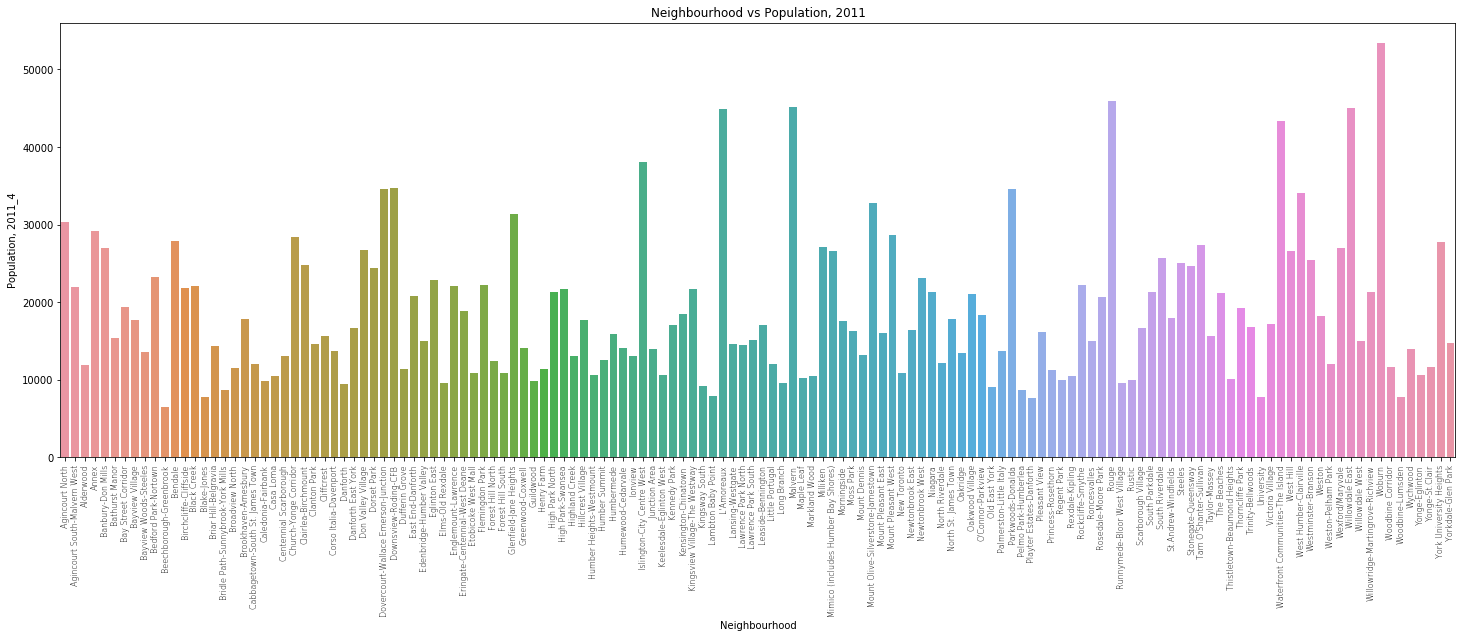

In [21]:
%matplotlib inline
import matplotlib.pyplot as plot

import seaborn as sns

fig_dims = (25, 8)
fig, ax = plot.subplots(figsize=fig_dims)

chart = sns.barplot(x="Neighbourhood",y="Population, 2011_4",ax =ax,data=df_data_1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontweight =10, size = 8)
plot.title('Neighbourhood vs Population, 2011')
plot.show(chart)


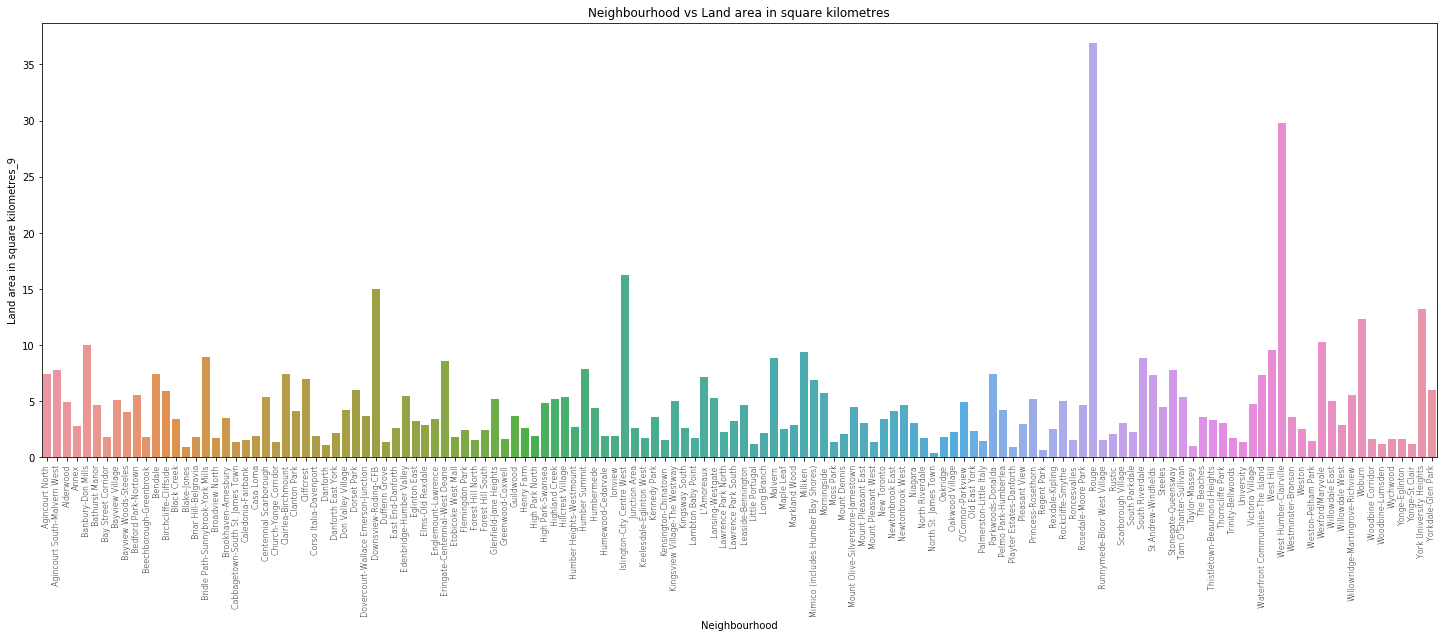

In [22]:
fig_dims = (25, 8)
fig, ax = plot.subplots(figsize=fig_dims)

chart = sns.barplot(x="Neighbourhood",y="Land area in square kilometres_9",ax =ax,data=df_data_1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontweight ='light', size =8)
plot.title('Neighbourhood vs Land area in square kilometres')
plot.show(chart)

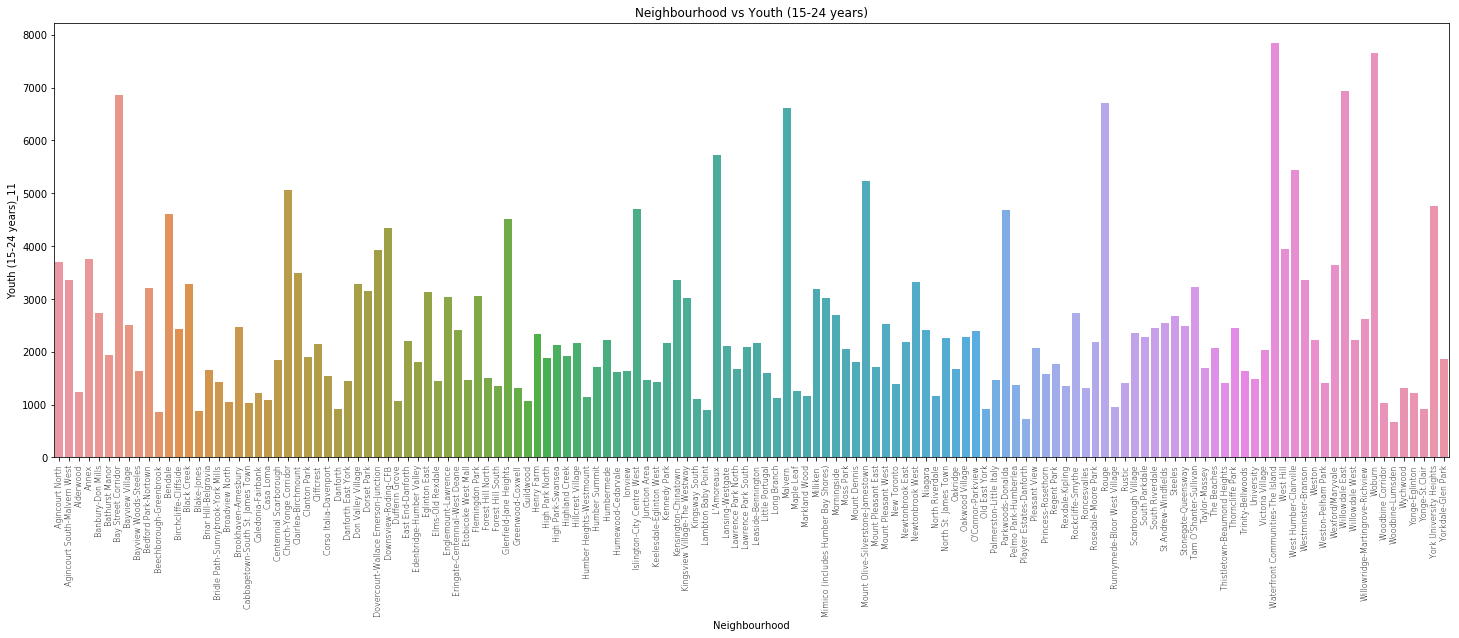

In [23]:
fig_dims = (25, 8)
fig, ax = plot.subplots(figsize=fig_dims)

chart = sns.barplot(x="Neighbourhood",y="Youth (15-24 years)_11",ax =ax,data=df_data_1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontweight ='light', size = 8)
plot.title('Neighbourhood vs Youth (15-24 years)')
plot.show(chart)

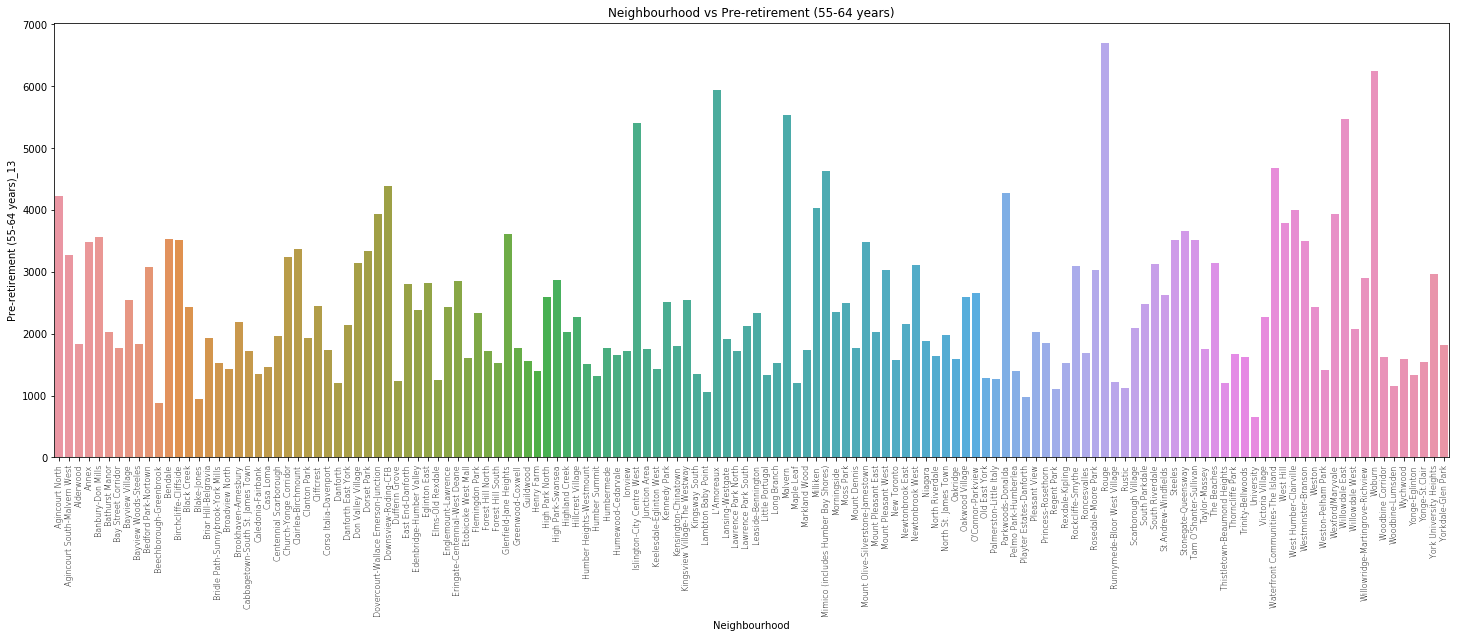

In [24]:
fig_dims = (25, 8)
fig, ax = plot.subplots(figsize=fig_dims)

chart = sns.barplot(x="Neighbourhood",y="Pre-retirement (55-64 years)_13",ax =ax,data=df_data_1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontweight ='light', size =8)
plot.title('Neighbourhood vs Pre-retirement (55-64 years)')
plot.show(chart)

### Normalize the data to prevent bias to certain columns due to the number size.

In [25]:
from sklearn.preprocessing import MinMaxScaler

df_tor = df_data_1.copy()
scaler = MinMaxScaler()
df_tor.iloc[:,1:] = scaler.fit_transform(df_tor.iloc[:,1:])

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
df_tor.head()

id,Neighbourhood,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,Children (0-14 years)_10,Youth (15-24 years)_11,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
0,Agincourt North,0.379803,0.507682,0.062081,0.148042,0.169790,0.066750,0.191664,0.361479,0.422889,...,0.191104,0.373337,0.557659,0.149208,0.201777,0.109462,0.040462,0.046436,0.028708,0.213190
1,Agincourt South-Malvern West,0.289538,0.330758,0.261745,0.129219,0.143967,0.046071,0.203181,0.277042,0.374738,...,0.153213,0.283503,0.371889,0.152969,0.210152,0.108431,0.046547,0.048473,0.049043,0.201943
2,Alderwood,0.092305,0.115573,0.149329,0.043591,0.051593,0.032231,0.124212,0.131898,0.078158,...,0.014827,0.092965,0.185068,0.024279,0.037056,0.016904,0.028293,0.036660,0.013158,0.005112
3,Annex,0.403617,0.484166,0.204698,0.344786,0.348607,0.226959,0.065533,0.198124,0.429170,...,0.266886,0.377250,0.351385,0.288841,0.348731,0.242218,0.226042,0.200815,0.309809,0.231595
4,Banbury-Don Mills,0.355905,0.435961,0.176174,0.217887,0.248622,0.040087,0.262133,0.335541,0.286811,...,0.116969,0.346117,0.467753,0.172347,0.254315,0.108225,0.072406,0.083503,0.049043,0.157464


In [27]:
df_tor.describe()

id,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,Children (0-14 years)_10,Youth (15-24 years)_11,Working Age (25-54 years)_12,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.217983,0.260147,0.195314,0.126671,0.139072,0.120633,0.111920,0.251541,0.245070,0.142455,...,0.132725,0.212763,0.276003,0.122284,0.157079,0.096821,0.066948,0.068734,0.069745,0.138417
std,0.169098,0.194205,0.149381,0.120696,0.125837,0.111836,0.124614,0.170665,0.203488,0.128042,...,0.138373,0.164975,0.184733,0.123094,0.135989,0.119330,0.104923,0.104632,0.109318,0.149010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091723,0.114501,0.122064,0.058131,0.065318,0.059039,0.039279,0.124724,0.105199,0.064101,...,0.043657,0.092356,0.143095,0.050410,0.072145,0.030664,0.021448,0.021385,0.022727,0.040005
50%,0.171439,0.210757,0.152685,0.092023,0.102897,0.093147,0.078284,0.203091,0.198883,0.111557,...,0.092257,0.166667,0.216965,0.094039,0.123477,0.068130,0.042440,0.044603,0.043062,0.099438
75%,0.291181,0.339710,0.198826,0.164670,0.180772,0.152059,0.136071,0.331402,0.327634,0.185073,...,0.168451,0.284742,0.371626,0.155477,0.209391,0.112966,0.070657,0.074440,0.071770,0.182132
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Download the latitude and longitude for each neighbourhood using the googlemaps API. Due to the inconsistency of geocode, googlemaps API is applied.

In [28]:
key = 'XXXXXXXXXXXXXXXXX' # Googlemaps API KEY
def latlong(val):
    
    response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={},+Toronto,+ON,+CA&key={}'.format(val, key))
    resp_json_payload = response.json()
    latitude = resp_json_payload['results'][0]['geometry']['location']['lat']
    longitude = resp_json_payload['results'][0]['geometry']['location']['lng']
    
    return(latitude, longitude)

In [29]:
df_ll = pd.DataFrame(columns=['Neighbourhood', 'Latitude', 'Longitude'])
df_ll.head()

,Neighbourhood,Latitude,Longitude


In [30]:
for i in df_tor.Neighbourhood:
    try:
        lat, long = latlong(i)
    except:
        lat = 0
        long = 0
    df_ll = df_ll.append({'Neighbourhood':i,'Latitude':lat, 'Longitude':long}, ignore_index=True)
    print('The latitude and longitude of {} is {} and {}'.format(i, lat, long))

The latitude and longitude of Agincourt North is 43.8080532 and -79.2665016
The latitude and longitude of Agincourt South-Malvern West is 43.7899638 and -79.24229559999999
The latitude and longitude of Alderwood is 43.6017103 and -79.5452384
The latitude and longitude of Annex is 43.6698329 and -79.407585
The latitude and longitude of Banbury-Don Mills is 43.7491152 and -79.3663593
The latitude and longitude of Bathurst Manor is 43.7628188 and -79.4568978
The latitude and longitude of Bay Street Corridor is 43.65729839999999 and -79.38436449999999
The latitude and longitude of Bayview Village is 43.778243 and -79.3827578
The latitude and longitude of Bayview Woods-Steeles is 43.7948077 and -79.3825152
The latitude and longitude of Bedford Park-Nortown is 43.7245589 and -79.41646449999999
The latitude and longitude of Beechborough-Greenbrook is 43.6943212 and -79.47479469999999
The latitude and longitude of Bendale is 43.765434 and -79.248935
The latitude and longitude of Birchcliffe-Cl

In [31]:
df_ll.head()

,Neighbourhood,Latitude,Longitude
0,Agincourt North,43.808053,-79.266502
1,Agincourt South-Malvern West,43.789964,-79.242296
2,Alderwood,43.601710,-79.545238
3,Annex,43.669833,-79.407585
4,Banbury-Don Mills,43.749115,-79.366359


In [32]:
df_ll.shape

(140, 3)

In [33]:
df_ll.isna().any()

Neighbourhood    False
Latitude         False
Longitude        False
dtype: bool

In [34]:
df_tor.insert(1, "Latitude", df_ll['Latitude'])
df_tor.insert(2, "Longitude", df_ll['Longitude'])
df_tor.head()

id,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
0,Agincourt North,43.808053,-79.266502,0.379803,0.507682,0.062081,0.148042,0.169790,0.066750,0.191664,...,0.191104,0.373337,0.557659,0.149208,0.201777,0.109462,0.040462,0.046436,0.028708,0.213190
1,Agincourt South-Malvern West,43.789964,-79.242296,0.289538,0.330758,0.261745,0.129219,0.143967,0.046071,0.203181,...,0.153213,0.283503,0.371889,0.152969,0.210152,0.108431,0.046547,0.048473,0.049043,0.201943
2,Alderwood,43.601710,-79.545238,0.092305,0.115573,0.149329,0.043591,0.051593,0.032231,0.124212,...,0.014827,0.092965,0.185068,0.024279,0.037056,0.016904,0.028293,0.036660,0.013158,0.005112
3,Annex,43.669833,-79.407585,0.403617,0.484166,0.204698,0.344786,0.348607,0.226959,0.065533,...,0.266886,0.377250,0.351385,0.288841,0.348731,0.242218,0.226042,0.200815,0.309809,0.231595
4,Banbury-Don Mills,43.749115,-79.366359,0.355905,0.435961,0.176174,0.217887,0.248622,0.040087,0.262133,...,0.116969,0.346117,0.467753,0.172347,0.254315,0.108225,0.072406,0.083503,0.049043,0.157464


In [35]:
df_tor.shape

(140, 2328)

In [36]:
df_tor[df_tor['Latitude']== 0].Neighbourhood


Series([], Name: Neighbourhood, dtype: object)

In [37]:
df_tor.isna().any()

id
Neighbourhood                                                              False
Latitude                                                                   False
Longitude                                                                  False
Population, 2016_3                                                         False
Population, 2011_4                                                         False
Population Change 2011-2016_5                                              False
Total private dwellings_6                                                  False
Private dwellings occupied by usual residents_7                            False
Population density per square kilometre_8                                  False
Land area in square kilometres_9                                           False
Children (0-14 years)_10                                                   False
Youth (15-24 years)_11                                                     False
Working Age (25-54 years)

### Below is a map of Toronto with the neighbourhoods superimposed on top.

In [38]:
address = 'Toronto, ON'

response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=Toronto,+ON,+CA&key={}'.format(key))
resp_json_payload = response.json()
latitude = resp_json_payload['results'][0]['geometry']['location']['lat']
longitude = resp_json_payload['results'][0]['geometry']['location']['lng']
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinate of Toronto are 43.653226, -79.3831843.


### Define Foursqaure Credentials and Version

In [39]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZBJGG1SBQOUOKBPY5P3INJU0O442YOE33I00GIVJMSWOHZEY
CLIENT_SECRET:TD3YMHUDAC2M1ZQC4SHYOIEKC4DMLTRVHFD5NC4OWOZH4XIL


# 3. Explore Neigbourhoods in Toronto

Below is a function to collect the top 100 venues in each neighbourhood within a 500 meter radius. It will return a dataframe highlighting all the venues for each neighbourhood and their category.

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    e = 0
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
   
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        if name == 'Rustic':
            print(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        e+=1

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
toronto_venues = getNearbyVenues(names=df_tor['Neighbourhood'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude']
                                  )

[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ccc982b2dc4370468afc808', 'name': 'Burger King', 'location': {'address': '555 University Ave', 'crossStreet': 'Sick Kids', 'lat': 43.70888, 'lng': -79.501224, 'labeledLatLngs': [{'label': 'display', 'lat': 43.70888, 'lng': -79.501224}], 'distance': 320, 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['555 University Ave (Sick Kids)', 'Toronto ON', 'Canada']}, 'categories': [{'id': '4bf58dd8d48988d16e941735', 'name': 'Fast Food Restaurant', 'pluralName': 'Fast Food Restaurants', 'shortName': 'Fast Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ccc982b2dc4370468afc808-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reaso

In [42]:
toronto_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt North,28,28,28,28,28,28
Agincourt South-Malvern West,13,13,13,13,13,13
Alderwood,8,8,8,8,8,8
Annex,23,23,23,23,23,23
Banbury-Don Mills,2,2,2,2,2,2
Bathurst Manor,4,4,4,4,4,4
Bay Street Corridor,77,77,77,77,77,77
Bayview Village,3,3,3,3,3,3
Bayview Woods-Steeles,3,3,3,3,3,3


In [43]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


# 4. Analyze each Neighbourhood

In [44]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agincourt North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### The rows are grouped by neighbourhood and by taking the mean of the frequency of occurence of each category

In [45]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt North,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.035714,0.000000,0.0,0.000000,0.000000,0.035714,0.000000,0.000000
1,Agincourt South-Malvern West,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alderwood,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Annex,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,Banbury-Don Mills,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bathurst Manor,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,Bay Street Corridor,0.0,0.0,0.0,0.000000,0.0,0.000000,0.012987,0.012987,0.000000,...,0.012987,0.000000,0.012987,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.012987
7,Bayview Village,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bayview Woods-Steeles,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bedford Park-Nortown,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.058824,0.000000,0.000000


#### Depending on the time the API's above might not return any data for a neighbourhood. The function removes every row that doesn't have venues returned.

In [46]:
for i in df_tor.Neighbourhood:
    if i in toronto_grouped.Neighbourhood.tolist():
        continue
    else:
        ind = df_tor[df_tor.Neighbourhood==i].index.values[0]
        df_tor.drop([ind], inplace =True)
        df_tor.reset_index(drop=True, inplace =True)
        

In [47]:
df_tor.shape

(139, 2328)

In [48]:
toronto_grouped.shape

(139, 269)

In [49]:
np.array(toronto_grouped.iloc[:,1:].max()).max()

1.0

#### Combining the venue data and population data.

In [50]:
toronto_full_grouped = pd.concat([toronto_grouped, df_tor.iloc[:,3:]], axis=1)

In [51]:
toronto_full_grouped.isna().any()

Neighbourhood                                                              False
Afghan Restaurant                                                          False
African Restaurant                                                         False
Airport Service                                                            False
American Restaurant                                                        False
Antique Shop                                                               False
Argentinian Restaurant                                                     False
Art Gallery                                                                False
Art Museum                                                                 False
Arts & Crafts Store                                                        False
Asian Restaurant                                                           False
Athletics & Sports                                                         False
Auto Dealership             

In [52]:
toronto_full_grouped.head()

,Neighbourhood,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,External migrants_2374,Total - Mobility status 5 years ago - 25% sample data_2375,Non-movers_2376,Movers_2377,Non-migrants_2378,Migrants_2379,Internal migrants_2380,Intraprovincial migrants_2381,Interprovincial migrants_2382,External migrants_2383
0,Agincourt North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.191104,0.373337,0.557659,0.149208,0.201777,0.109462,0.040462,0.046436,0.028708,0.213190
1,Agincourt South-Malvern West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153213,0.283503,0.371889,0.152969,0.210152,0.108431,0.046547,0.048473,0.049043,0.201943
2,Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014827,0.092965,0.185068,0.024279,0.037056,0.016904,0.028293,0.036660,0.013158,0.005112
3,Annex,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.266886,0.377250,0.351385,0.288841,0.348731,0.242218,0.226042,0.200815,0.309809,0.231595
4,Banbury-Don Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.116969,0.346117,0.467753,0.172347,0.254315,0.108225,0.072406,0.083503,0.049043,0.157464


In [53]:
toronto_full_grouped.shape

(139, 2594)

### Lets print each Neighbourhood along with the top  5 most common venues.

In [54]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt North----
                venue  freq
0              Bakery  0.07
1  Chinese Restaurant  0.07
2                Bank  0.07
3   Convenience Store  0.04
4                 Spa  0.04


----Agincourt South-Malvern West----
                venue  freq
0         Gas Station  0.23
1     Auto Dealership  0.08
2   Mobile Phone Shop  0.08
3  Chinese Restaurant  0.08
4      Discount Store  0.08


----Alderwood----
          venue  freq
0   Pizza Place  0.25
1           Pub  0.12
2  Skating Rink  0.12
3   Coffee Shop  0.12
4           Gym  0.12


----Annex----
                           venue  freq
0                    Pizza Place  0.09
1  Vegetarian / Vegan Restaurant  0.09
2                           Park  0.09
3                  Grocery Store  0.04
4                  Burrito Place  0.04


----Banbury-Don Mills----
                        venue  freq
0                Soccer Field   0.5
1                        Park   0.5
2           Afghan Restaurant   0.0
3  Modern European Restaura

### Let's put that into a pandas dataframe

In [55]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Bank,Bakery,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Fast Food Restaurant,Sporting Goods Shop,Juice Bar,Restaurant,Japanese Restaurant
1,Agincourt South-Malvern West,Gas Station,Pharmacy,Sandwich Place,Diner,Rental Car Location,Mobile Phone Shop,Auto Dealership,Chinese Restaurant,Discount Store,Supermarket
2,Alderwood,Pizza Place,Coffee Shop,Pub,Skating Rink,Sandwich Place,Gym,Pharmacy,Egyptian Restaurant,Electronics Store,Eastern European Restaurant
3,Annex,Park,Pizza Place,Vegetarian / Vegan Restaurant,Pastry Shop,Eastern European Restaurant,Tea Room,Bar,Thai Restaurant,Bakery,Bike Shop
4,Banbury-Don Mills,Park,Soccer Field,Yoga Studio,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant


In [57]:
from scipy.spatial.distance import cdist 

In [58]:
toronto_full_grouped = toronto_full_grouped.fillna(0)

# 5. Cluster Neighbourhoods

#### With KMeans, a loop is created to search for the optimal numbers of cluster using the Elbow method. Distortion and Inertia are used as the metric. 

In [59]:
toronto_grouped_clustering = toronto_full_grouped.drop('Neighbourhood', 1)
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,30) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(toronto_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

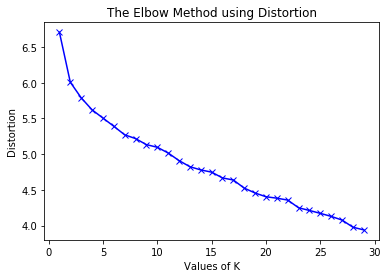

In [60]:
plot.plot(K, distortions, 'bx-') 
plot.xlabel('Values of K') 
plot.ylabel('Distortion') 
plot.title('The Elbow Method using Distortion') 
plot.show() 

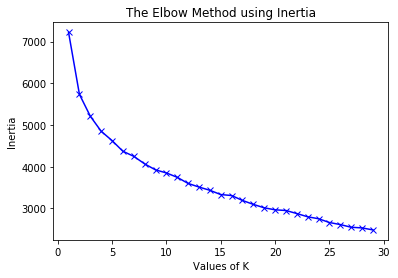

In [61]:
plot.plot(K, inertias, 'bx-') 
plot.xlabel('Values of K') 
plot.ylabel('Inertia') 
plot.title('The Elbow Method using Inertia') 
plot.show() 

#### It's not clear where the elbow is so 10 is chosen.

In [62]:
# set number of clusters
kclusters = 10

 # run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([6, 6, 0, 8, 4, 0, 8, 2, 0, 4], dtype=int32)

In [63]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = df_tor

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

downtown_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,43.808053,-79.266502,0.379803,0.507682,0.062081,0.148042,0.169790,0.066750,0.191664,...,Bank,Bakery,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Fast Food Restaurant,Sporting Goods Shop,Juice Bar,Restaurant,Japanese Restaurant
1,Agincourt South-Malvern West,43.789964,-79.242296,0.289538,0.330758,0.261745,0.129219,0.143967,0.046071,0.203181,...,Gas Station,Pharmacy,Sandwich Place,Diner,Rental Car Location,Mobile Phone Shop,Auto Dealership,Chinese Restaurant,Discount Store,Supermarket
2,Alderwood,43.601710,-79.545238,0.092305,0.115573,0.149329,0.043591,0.051593,0.032231,0.124212,...,Pizza Place,Coffee Shop,Pub,Skating Rink,Sandwich Place,Gym,Pharmacy,Egyptian Restaurant,Electronics Store,Eastern European Restaurant
3,Annex,43.669833,-79.407585,0.403617,0.484166,0.204698,0.344786,0.348607,0.226959,0.065533,...,Park,Pizza Place,Vegetarian / Vegan Restaurant,Pastry Shop,Eastern European Restaurant,Tea Room,Bar,Thai Restaurant,Bakery,Bike Shop
4,Banbury-Don Mills,43.749115,-79.366359,0.355905,0.435961,0.176174,0.217887,0.248622,0.040087,0.262133,...,Park,Soccer Field,Yoga Studio,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant


In [64]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [65]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighbourhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### HDBSCAN is used to find the optimal number of clusters due to the high dimensionality of the data.

In [66]:
!pip install hdbscan

In [67]:
import hdbscan

In [68]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
cluster_labels = clusterer.fit_predict(toronto_grouped_clustering)

In [69]:
set(cluster_labels)

{-1, 0, 1, 2, 3, 4}

# 6. Examine Cluster

In [70]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'HDB Cluster Labels', cluster_labels)


downtown_merged = downtown_merged.join(neighborhoods_venues_sorted[['Neighbourhood','HDB Cluster Labels']].set_index('Neighbourhood'), on='Neighbourhood')

downtown_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
0,Agincourt North,43.808053,-79.266502,0.379803,0.507682,0.062081,0.148042,0.169790,0.066750,0.191664,...,Bakery,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Fast Food Restaurant,Sporting Goods Shop,Juice Bar,Restaurant,Japanese Restaurant,3
1,Agincourt South-Malvern West,43.789964,-79.242296,0.289538,0.330758,0.261745,0.129219,0.143967,0.046071,0.203181,...,Pharmacy,Sandwich Place,Diner,Rental Car Location,Mobile Phone Shop,Auto Dealership,Chinese Restaurant,Discount Store,Supermarket,3
2,Alderwood,43.601710,-79.545238,0.092305,0.115573,0.149329,0.043591,0.051593,0.032231,0.124212,...,Coffee Shop,Pub,Skating Rink,Sandwich Place,Gym,Pharmacy,Egyptian Restaurant,Electronics Store,Eastern European Restaurant,3
3,Annex,43.669833,-79.407585,0.403617,0.484166,0.204698,0.344786,0.348607,0.226959,0.065533,...,Pizza Place,Vegetarian / Vegan Restaurant,Pastry Shop,Eastern European Restaurant,Tea Room,Bar,Thai Restaurant,Bakery,Bike Shop,1
4,Banbury-Don Mills,43.749115,-79.366359,0.355905,0.435961,0.176174,0.217887,0.248622,0.040087,0.262133,...,Soccer Field,Yoga Studio,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,3


In [71]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
hclusters = len(set(cluster_labels))
# set color scheme for the clusters
x = np.arange(hclusters)
ys = [i + x + (i*x)**2 for i in range(hclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighbourhood'], downtown_merged['HDB Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [72]:
downtown_merged.loc[downtown_merged['HDB Cluster Labels'] == -1]

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
6,Bay Street Corridor,43.657298,-79.384364,0.323918,0.274423,0.686242,0.352149,0.326038,0.301680,0.038662,...,Middle Eastern Restaurant,Italian Restaurant,Sandwich Place,Bubble Tea Shop,Hotel,Burger Joint,Diner,Restaurant,Clothing Store,-1
23,Church-Yonge Corridor,43.672858,-79.387839,0.417335,0.466497,0.305369,0.432013,0.446911,0.508399,0.025775,...,Spa,Café,Sushi Restaurant,Japanese Restaurant,Boutique,French Restaurant,Hotel,Women's Store,Coffee Shop,-1
32,Dovercourt-Wallace Emerson-Junction,43.668401,-79.440595,0.506404,0.600551,0.224832,0.302884,0.332494,0.202837,0.090760,...,Gym / Fitness Center,Gas Station,Park,Pool,Music Venue,Middle Eastern Restaurant,Liquor Store,Brewery,Bar,-1
33,Downsview-Roding-CFB,43.729791,-79.492345,0.479894,0.601148,0.145973,0.257762,0.274786,0.029967,0.399781,...,Baseball Field,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Egyptian Restaurant,Field,-1
58,Islington-City Centre West,43.630916,-79.543484,0.630107,0.674235,0.385906,0.385360,0.437674,0.038631,0.432959,...,Fast Food Restaurant,Rental Car Location,Vietnamese Restaurant,Sandwich Place,Ice Cream Shop,Pizza Place,Concert Hall,Cosmetics Shop,Comic Shop,-1
65,Lambton Baby Point,43.656042,-79.494292,0.023729,0.030579,0.140940,0.009479,0.012360,0.084494,0.035097,...,Playground,Garden,Yoga Studio,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,-1
77,Mimico (includes Humber Bay Shores),43.625994,-79.477419,0.461558,0.427916,0.597315,0.398307,0.397077,0.089531,0.177954,...,Park,Ice Cream Shop,Field,Beach,Grocery Store,Furniture / Home Store,Bus Line,Italian Restaurant,Sushi Restaurant,-1
79,Moss Park,43.654789,-79.372602,0.234748,0.209509,0.560403,0.218787,0.233664,0.316836,0.026597,...,Coffee Shop,Italian Restaurant,Gastropub,Hotel,Japanese Restaurant,Thai Restaurant,Theater,Middle Eastern Restaurant,Diner,-1
81,Mount Olive-Silverstone-Jamestown,43.741149,-79.589238,0.444536,0.561222,0.135906,0.167158,0.189603,0.144428,0.112421,...,Pizza Place,Fried Chicken Joint,Pharmacy,Coffee Shop,Sandwich Place,Liquor Store,Beer Store,Fast Food Restaurant,Gift Shop,-1
87,Niagara,43.637383,-79.408493,0.414639,0.315522,0.909396,0.379709,0.423135,0.210624,0.072662,...,Gym,Café,Pizza Place,Arts & Crafts Store,Dog Run,Coffee Shop,Tourist Information Center,Trail,Historic Site,-1


In [73]:
downtown_merged.loc[downtown_merged['HDB Cluster Labels'] == 0]

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
73,Malvern,43.809160,-79.221690,0.627225,0.823652,0.078859,0.250827,0.282790,0.090294,0.231149,...,Fast Food Restaurant,Pharmacy,Gym / Fitness Center,Grocery Store,Convenience Store,Restaurant,Park,Skating Rink,Bubble Tea Shop,0
104,Rouge,43.804929,-79.165842,0.672762,0.841279,0.149329,0.246189,0.281819,0.005083,1.000000,...,Fast Food Restaurant,Pharmacy,Eastern European Restaurant,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Yoga Studio,0


In [74]:
downtown_merged.loc[downtown_merged['HDB Cluster Labels'] == 1]

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
3,Annex,43.669833,-79.407585,0.403617,0.484166,0.204698,0.344786,0.348607,0.226959,0.065533,...,Pizza Place,Vegetarian / Vegan Restaurant,Pastry Shop,Eastern European Restaurant,Tea Room,Bar,Thai Restaurant,Bakery,Bike Shop,1
83,Mount Pleasant West,43.704851,-79.394420,0.388988,0.471704,0.189597,0.353478,0.389624,0.483561,0.025500,...,Italian Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Bar,Dessert Shop,Café,Pizza Place,Ice Cream Shop,Pub,1


In [75]:
downtown_merged.loc[downtown_merged['HDB Cluster Labels'] == 2]

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
42,Flemingdon Park,43.718373,-79.331390,0.258797,0.334599,0.109060,0.116362,0.135937,0.184515,0.055114,...,Fast Food Restaurant,Gym / Fitness Center,Gym,Grocery Store,Yoga Studio,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,2
117,Thorncliffe Park,43.707484,-79.343597,0.244893,0.271798,0.291946,0.099723,0.117383,0.132783,0.073759,...,Bank,Indian Restaurant,Turkish Restaurant,Fried Chicken Joint,Fast Food Restaurant,Liquor Store,Middle Eastern Restaurant,Pharmacy,Pizza Place,2


In [76]:
downtown_merged.loc[downtown_merged['HDB Cluster Labels'] == 3]

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
0,Agincourt North,43.808053,-79.266502,0.379803,0.507682,0.062081,0.148042,0.169790,0.066750,0.191664,...,Bakery,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Fast Food Restaurant,Sporting Goods Shop,Juice Bar,Restaurant,Japanese Restaurant,3
1,Agincourt South-Malvern West,43.789964,-79.242296,0.289538,0.330758,0.261745,0.129219,0.143967,0.046071,0.203181,...,Pharmacy,Sandwich Place,Diner,Rental Car Location,Mobile Phone Shop,Auto Dealership,Chinese Restaurant,Discount Store,Supermarket,3
2,Alderwood,43.601710,-79.545238,0.092305,0.115573,0.149329,0.043591,0.051593,0.032231,0.124212,...,Coffee Shop,Pub,Skating Rink,Sandwich Place,Gym,Pharmacy,Egyptian Restaurant,Electronics Store,Eastern European Restaurant,3
4,Banbury-Don Mills,43.749115,-79.366359,0.355905,0.435961,0.176174,0.217887,0.248622,0.040087,0.262133,...,Soccer Field,Yoga Studio,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,3
5,Bathurst Manor,43.762819,-79.456898,0.156667,0.190901,0.174497,0.081553,0.090248,0.053996,0.117357,...,Playground,Convenience Store,Baseball Field,Egyptian Restaurant,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,3
7,Bayview Village,43.778243,-79.382758,0.249747,0.238637,0.481544,0.164704,0.180601,0.072896,0.128325,...,Gas Station,Flower Shop,Yoga Studio,Dumpling Restaurant,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,3
8,Bayview Woods-Steeles,43.794808,-79.382515,0.110843,0.150271,0.080537,0.047261,0.053745,0.050831,0.099808,...,Dog Run,Yoga Studio,Dumpling Restaurant,Dive Bar,Doctor's Office,Doner Restaurant,Donut Shop,Eastern European Restaurant,Discount Store,3
9,Bedford Park-Nortown,43.724559,-79.416464,0.280757,0.356301,0.130872,0.140860,0.156327,0.073219,0.139841,...,Bank,Pizza Place,Fast Food Restaurant,Pharmacy,Beer Store,Italian Restaurant,Bagel Shop,Baby Store,Bakery,3
10,Beechborough-Greenbrook,43.694321,-79.474795,0.000000,0.000000,0.151007,0.000000,0.000000,0.059472,0.038388,...,Convenience Store,Coffee Shop,Sandwich Place,Yoga Studio,Donut Shop,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,3
11,Bendale,43.765434,-79.248935,0.394078,0.456404,0.253356,0.191318,0.212985,0.068644,0.193310,...,Yoga Studio,Eastern European Restaurant,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Egyptian Restaurant,Distribution Center,3


In [77]:
downtown_merged.loc[downtown_merged['HDB Cluster Labels'] == 4]

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
13,Black Creek,43.697015,-79.486948,0.255494,0.332231,0.102349,0.109765,0.122658,0.121116,0.083356,...,Construction & Landscaping,Coffee Shop,Yoga Studio,Eastern European Restaurant,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,4
45,Glenfield-Jane Heights,43.706822,-79.304340,0.403027,0.531390,0.078859,0.171729,0.190705,0.111458,0.131067,...,Coffee Shop,Yoga Studio,Eastern European Restaurant,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Egyptian Restaurant,4


## A sample of the neighbourhood dataframe with their clusters

In [80]:
downtown_merged.sample(frac=0.10)

,Neighbourhood,Latitude,Longitude,"Population, 2016_3","Population, 2011_4",Population Change 2011-2016_5,Total private dwellings_6,Private dwellings occupied by usual residents_7,Population density per square kilometre_8,Land area in square kilometres_9,...,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,HDB Cluster Labels
102,Roncesvalles,43.646317,-79.449068,0.141516,0.182707,0.119128,0.101524,0.111190,0.203577,0.030162,...,Grocery Store,Bakery,Food & Drink Shop,Eastern European Restaurant,Café,Sushi Restaurant,Bookstore,Thai Restaurant,American Restaurant,3
21,Casa Loma,43.676843,-79.410363,0.074002,0.085336,0.204698,0.068381,0.072325,0.107276,0.041404,...,History Museum,Café,Coffee Shop,Castle,Burger Joint,Donut Shop,Steakhouse,Jewish Restaurant,Middle Eastern Restaurant,3
35,East End-Danforth,43.678182,-79.309632,0.249494,0.306240,0.171141,0.151735,0.171364,0.161688,0.061420,...,Asian Restaurant,Café,Gas Station,Flower Shop,Hungarian Restaurant,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,3
54,Humber Summit,43.760100,-79.571785,0.098406,0.128825,0.112416,0.033594,0.032725,0.012246,0.205374,...,Park,Gym,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Yoga Studio,3
23,Church-Yonge Corridor,43.672858,-79.387839,0.417335,0.466497,0.305369,0.432013,0.446911,0.508399,0.025775,...,Spa,Café,Sushi Restaurant,Japanese Restaurant,Boutique,French Restaurant,Hotel,Women's Store,Coffee Shop,-1
6,Bay Street Corridor,43.657298,-79.384364,0.323918,0.274423,0.686242,0.352149,0.326038,0.301680,0.038662,...,Middle Eastern Restaurant,Italian Restaurant,Sandwich Place,Bubble Tea Shop,Hotel,Burger Joint,Diner,Restaurant,Clothing Store,-1
125,Weston,43.700167,-79.516264,0.192379,0.249285,0.110738,0.118546,0.129901,0.142256,0.057033,...,Coffee Shop,Pharmacy,Discount Store,Diner,Bank,Sandwich Place,Soccer Field,Middle Eastern Restaurant,Fried Chicken Joint,3
28,Danforth,43.686952,-79.307341,0.052059,0.063079,0.167785,0.029541,0.033459,0.173610,0.019468,...,Thai Restaurant,Breakfast Spot,Coffee Shop,Middle Eastern Restaurant,Gaming Cafe,Thrift / Vintage Store,Gas Station,Sushi Restaurant,Music Store,3
100,Rexdale-Kipling,43.719857,-79.570600,0.066604,0.085357,0.134228,0.026862,0.031386,0.073681,0.056759,...,Pizza Place,Sandwich Place,Auto Workshop,Department Store,Bakery,Donut Shop,Doctor's Office,Dog Run,Doner Restaurant,3
16,Bridle Path-Sunnybrook-York Mills,43.735914,-79.371899,0.045318,0.047480,0.233221,0.015356,0.015509,0.000000,0.232794,...,Yoga Studio,Distribution Center,Falafel Restaurant,Event Space,Ethiopian Restaurant,Elementary School,Electronics Store,Egyptian Restaurant,Eastern European Restaurant,3
